# Project Title : Book Recommendation

# Business Objective:

## Generate the features from the dataset and use them to recommend the books accordingly to the users.


# Content

## The Book-Crossing dataset comprises 3 files.

### •	Users
Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL-values.

### •	Books
Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title, Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavours (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon web site.

### •	Ratings
Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ratings = pd.read_csv('Ratings.csv', low_memory=False,encoding="latin-1")
users = pd.read_csv('Users.csv', low_memory=False,encoding="latin-1")
books = pd.read_csv('Books.csv', low_memory=False,encoding="latin-1")

#### Books data

In [3]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
print("No. of observations:{}\nNo. of parameters:{}".format(books.shape[0],books.shape[1]))

No. of observations:271360
No. of parameters:8


In [5]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [6]:
books.dtypes

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object

In [7]:
books.duplicated().sum()

0

In [8]:
books['Year-Of-Publication'].unique()

array(['2002', '2001', '1991', '1999', '2000', '1993', '1996', '1988',
       '2004', '1998', '1994', '2003', '1997', '1983', '1979', '1995',
       '1982', '1985', '1992', '1986', '1978', '1980', '1952', '1987',
       '1990', '1981', '1989', '1984', '0', '1968', '1961', '1958',
       '1974', '1976', '1971', '1977', '1975', '1965', '1941', '1970',
       '1962', '1973', '1972', '1960', '1966', '1920', '1956', '1959',
       '1953', '1951', '1942', '1963', '1964', '1969', '1954', '1950',
       '1967', '2005', '1957', '1940', '1937', '1955', '1946', '1936',
       '1930', '2011', '1925', '1948', '1943', '1947', '1945', '1923',
       '2020', '1939', '1926', '1938', '2030', '1911', '1904', '1949',
       '1932', '1928', '1929', '1927', '1931', '1914', '2050', '1934',
       '1910', '1933', '1902', '1924', '1921', '1900', '2038', '2026',
       '1944', '1917', '1901', '2010', '1908', '1906', '1935', '1806',
       '2021', '2012', '2006', 'DK Publishing Inc', 'Gallimard', '1909',
       

In [9]:
#since year data has some object it it, we shall convert it into null data
books['Year-Of-Publication'] = pd.to_numeric(books['Year-Of-Publication'],errors='coerce')
books['Year-Of-Publication'].isna().sum()

3

In [10]:
#since year data has the year 0 and 2022 which is invalid, we shall convert it into null data
books.loc[(books['Year-Of-Publication'] > 2022) | (books['Year-Of-Publication'] == 0), 'year'] = np.NAN
#Replacing null data with median 
books['Year-Of-Publication'].fillna(books['year'].median() , inplace = True)
books['Year-Of-Publication'].isna().sum()

3

In [11]:
#Finding and replacing null data from publisher
books.loc[books['Publisher'].isna()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,year
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002.0,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001.0,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,NaN


In [12]:
#Replacing null data from publisher
books['Publisher'].fillna('other' , inplace = True)
books['Publisher'].isna().sum()

0

In [13]:
#Finding and replacing null data from author
books.loc[books['Book-Author'].isna()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,year
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995.0,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,NaN


In [14]:
#replacing null data from publisher
books['Book-Author'].fillna("Unknown" , inplace = True)
books['Book-Author'].isna().sum()

0

#### User data

In [15]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [16]:
users.isna().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

<Axes: xlabel='Age'>

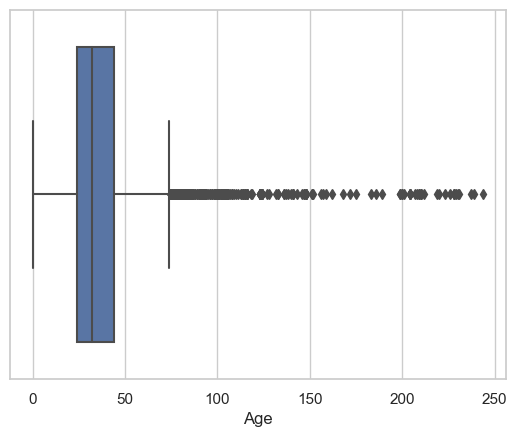

In [17]:
sns.set(style="whitegrid")
sns.boxplot(x='Age',data=users)

In [18]:
print(sorted(users['Age'].unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

In [19]:
#removing age above 100 and below 5 
users.loc[(users['Age'] > 100) | (users['Age'] < 5) , 'Age' ] = np.NAN

In [20]:
users['Age'].isna().sum()

112010

In [21]:
#Filling the null values with mean
users['Age'].fillna(users['Age'].mean(), inplace = True)

In [22]:
users.duplicated().sum()

0

#### Rating data

In [23]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,2,195153448,0
1,7,34542252,0
2,8,2005018,5
3,8,60973129,0
4,8,374157065,0


In [24]:
ratings.shape

(1048575, 3)

In [25]:
ratings.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [26]:
ratings.duplicated().sum()

72

In [27]:
ratings.loc[ratings['Book-Rating'] == 0]

,User-ID,ISBN,Book-Rating
0,2,195153448,0
1,7,34542252,0
3,8,60973129,0
4,8,374157065,0
5,8,393045218,0
...,...,...,...
1048552,278851,553277375,0
1048554,278851,743203763,0
1048563,278851,1566910102,0
1048571,278854,515087122,0


<Axes: >

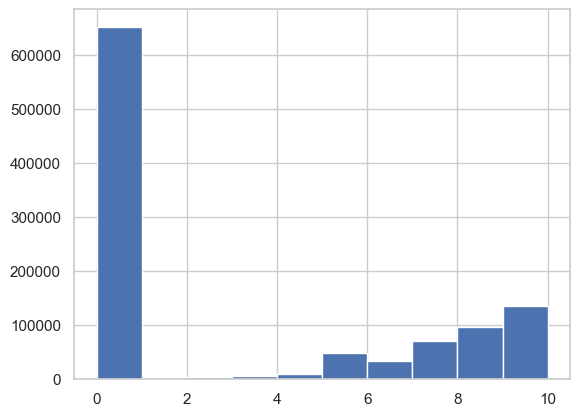

In [28]:
ratings['Book-Rating'].hist(bins=10)

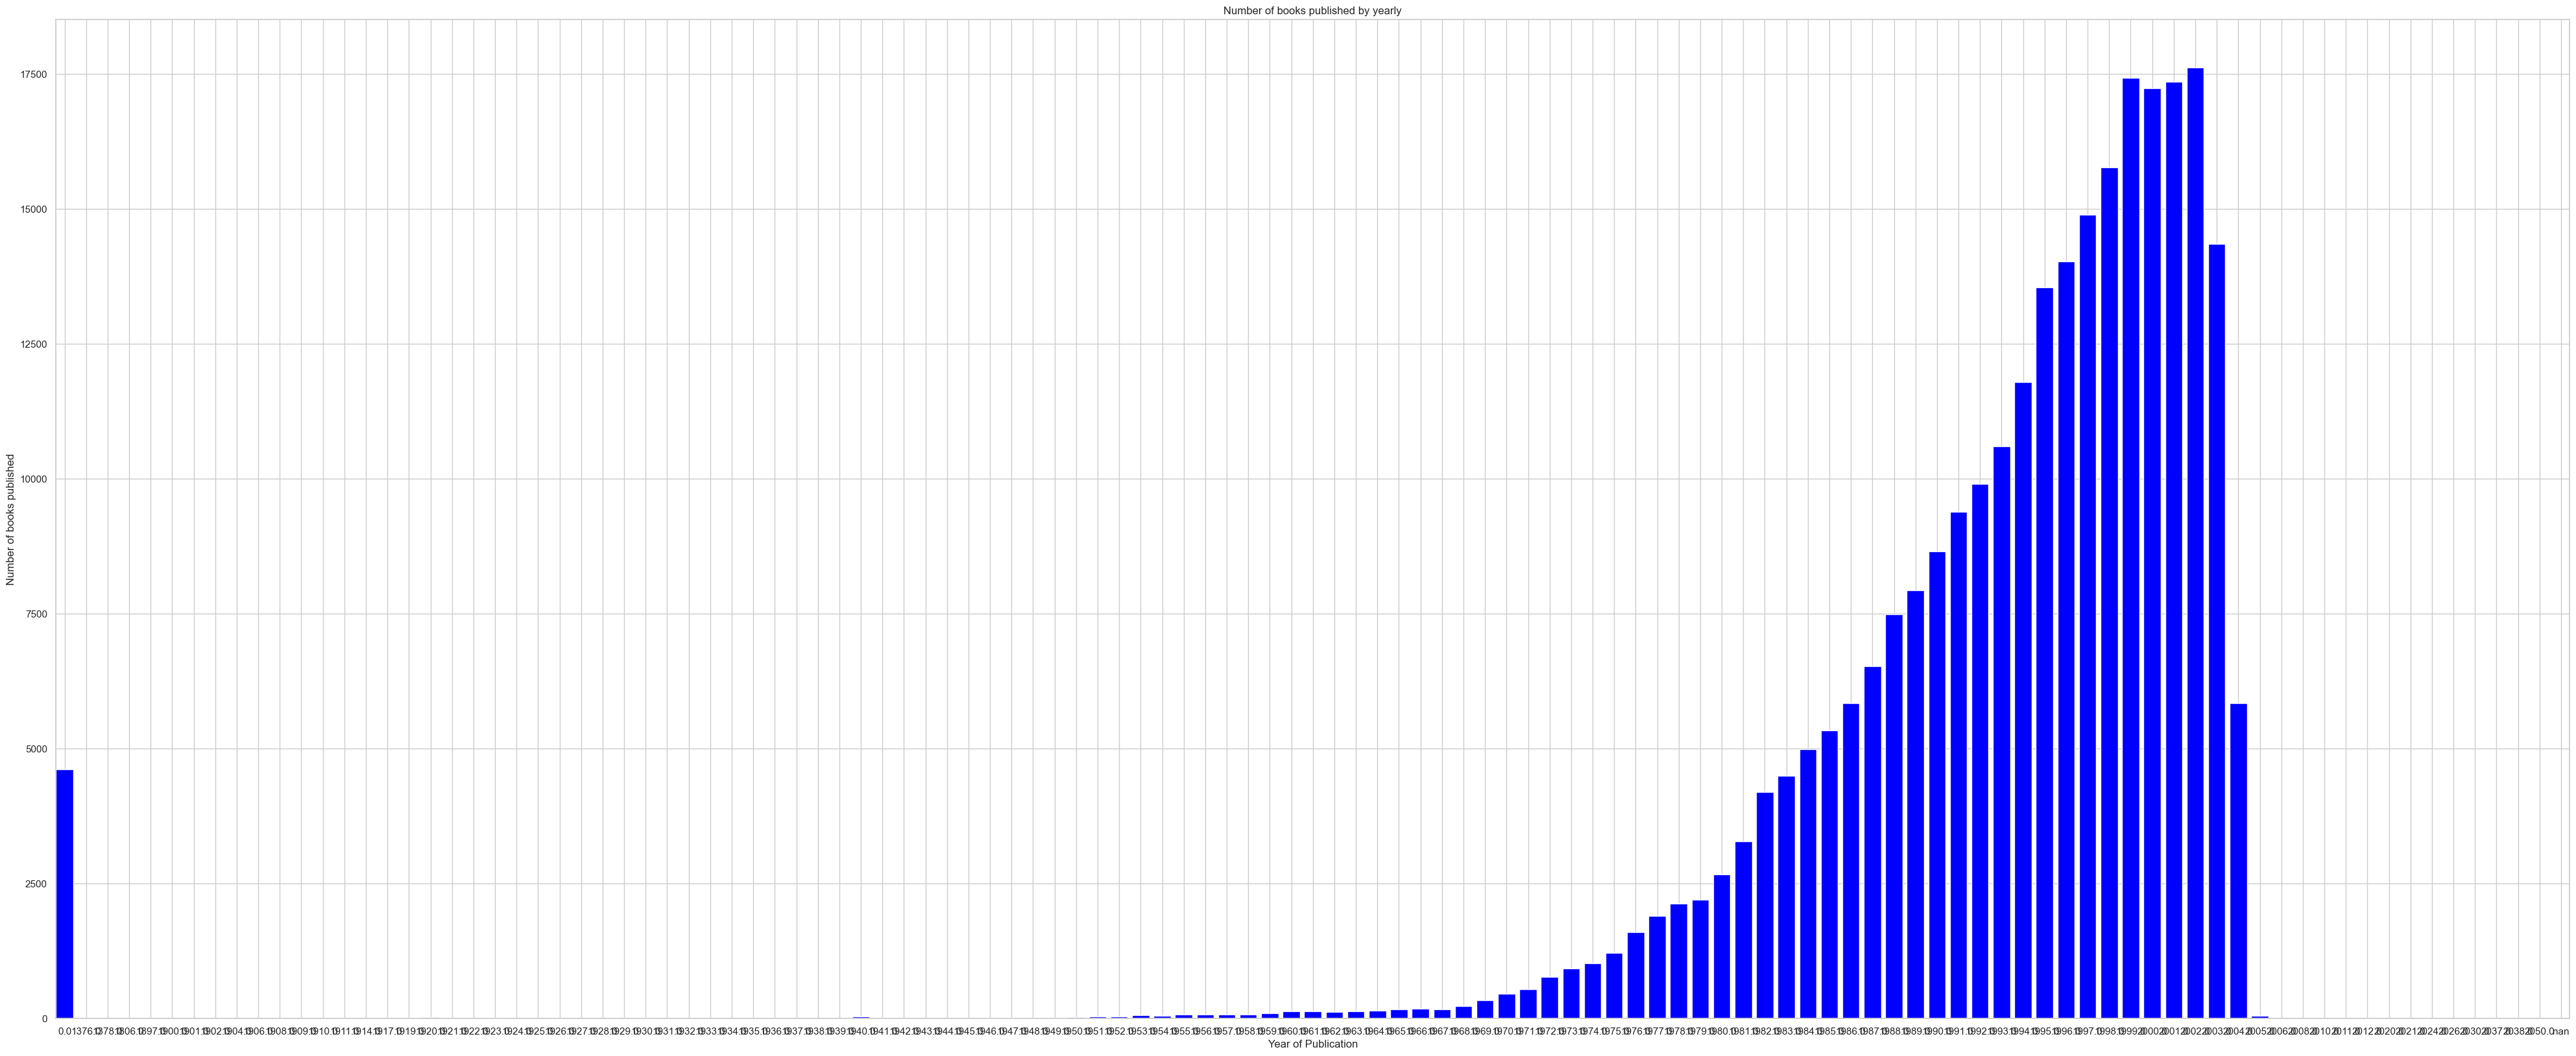

In [29]:
publications = {}
for year in books['Year-Of-Publication']:
    if str(year) not in publications:
        publications[str(year)] = 0
    publications[str(year)] +=1

publications = {k:v for k, v in sorted(publications.items())}

fig = plt.figure(figsize =(50, 20))
plt.bar(list(publications.keys()),list(publications.values()), color = 'blue')
plt.ylabel("Number of books published")
plt.xlabel("Year of Publication")
plt.title("Number of books published by yearly")
plt.margins(x = 0)
plt.show()

<Axes: xlabel='Book-Rating', ylabel='count'>

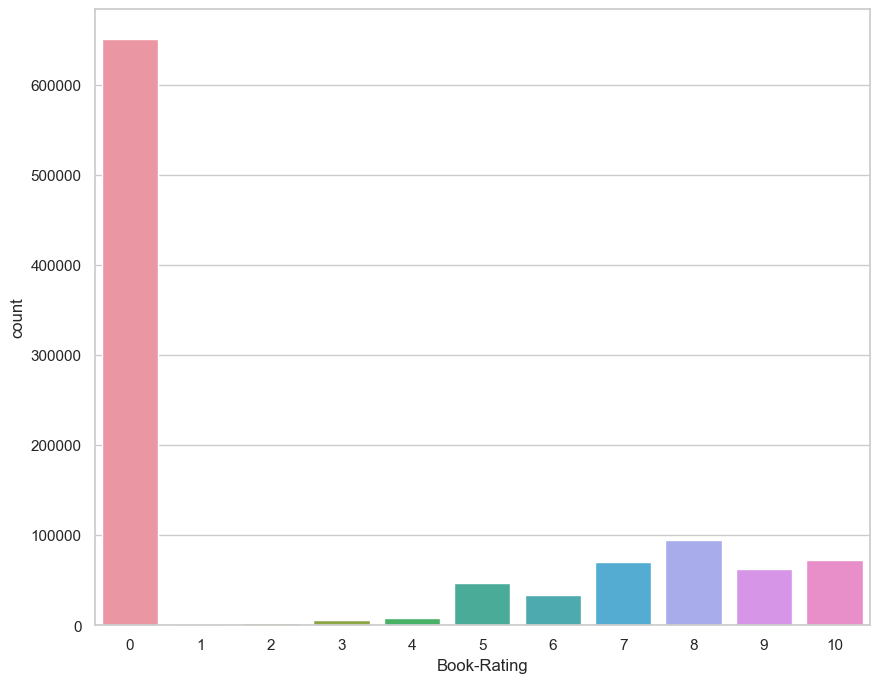

In [30]:
plt.figure(figsize=(10,8))
sns.countplot(x="Book-Rating", data=ratings)

Text(0.5, 1.0, 'Explicit Ratings')

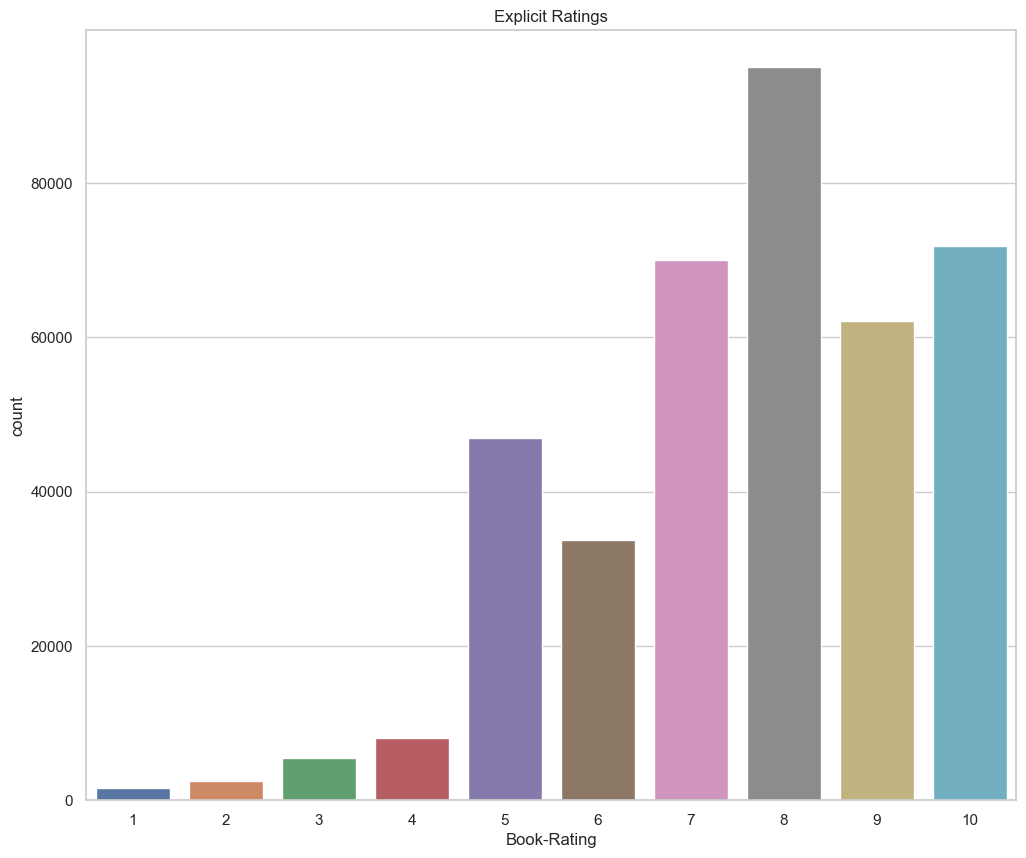

In [31]:
# Explicit Ratings
plt.figure(figsize=(12,10))
data = ratings[ratings['Book-Rating'] != 0]
sns.countplot(x="Book-Rating", data=data)
plt.title("Explicit Ratings")

Text(0.5, 1.0, 'Number of books by an author (Top 20)')

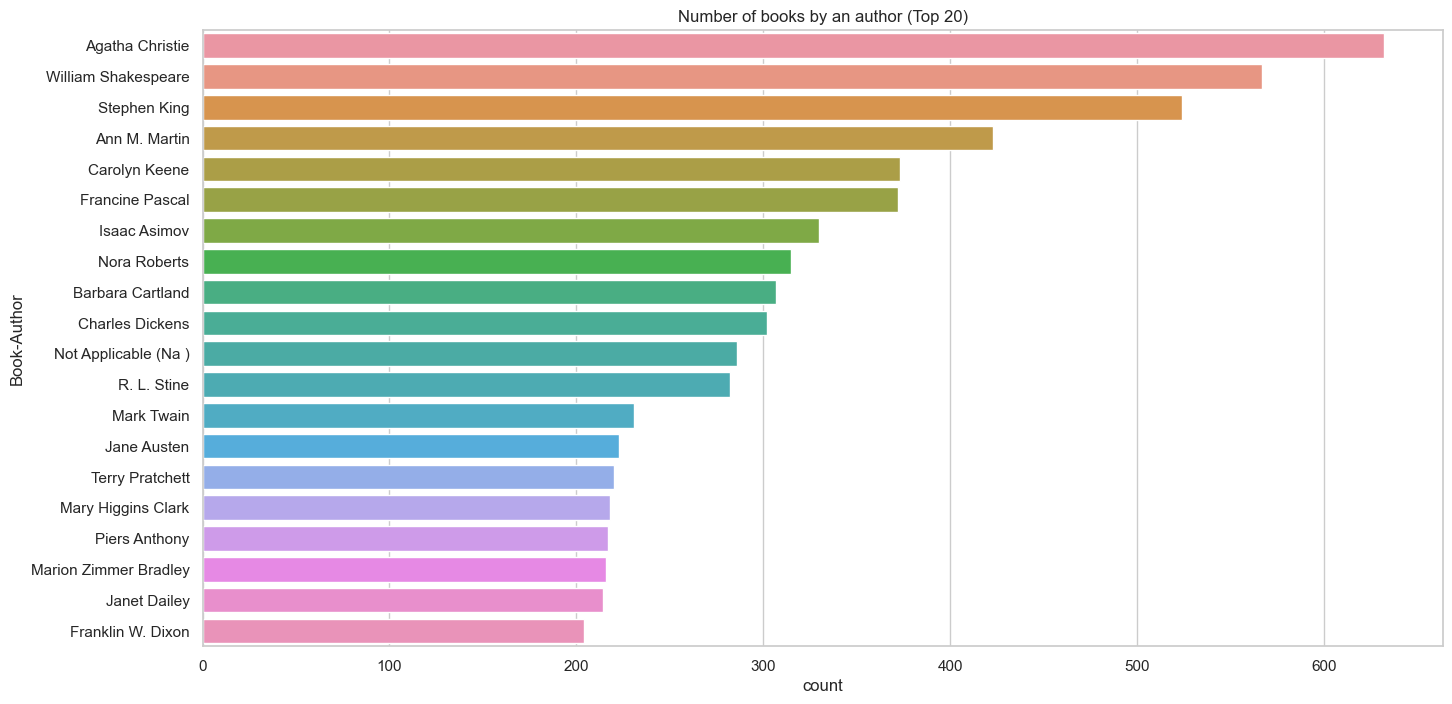

In [32]:
#number of books published by an author (top-20)
plt.figure(figsize=(16,8))
sns.countplot(y="Book-Author", data=books,order=books['Book-Author'].value_counts().index[0:20])
plt.title("Number of books by an author (Top 20)")

Text(0.5, 1.0, 'Number of books published by a publisher (Top 20)')

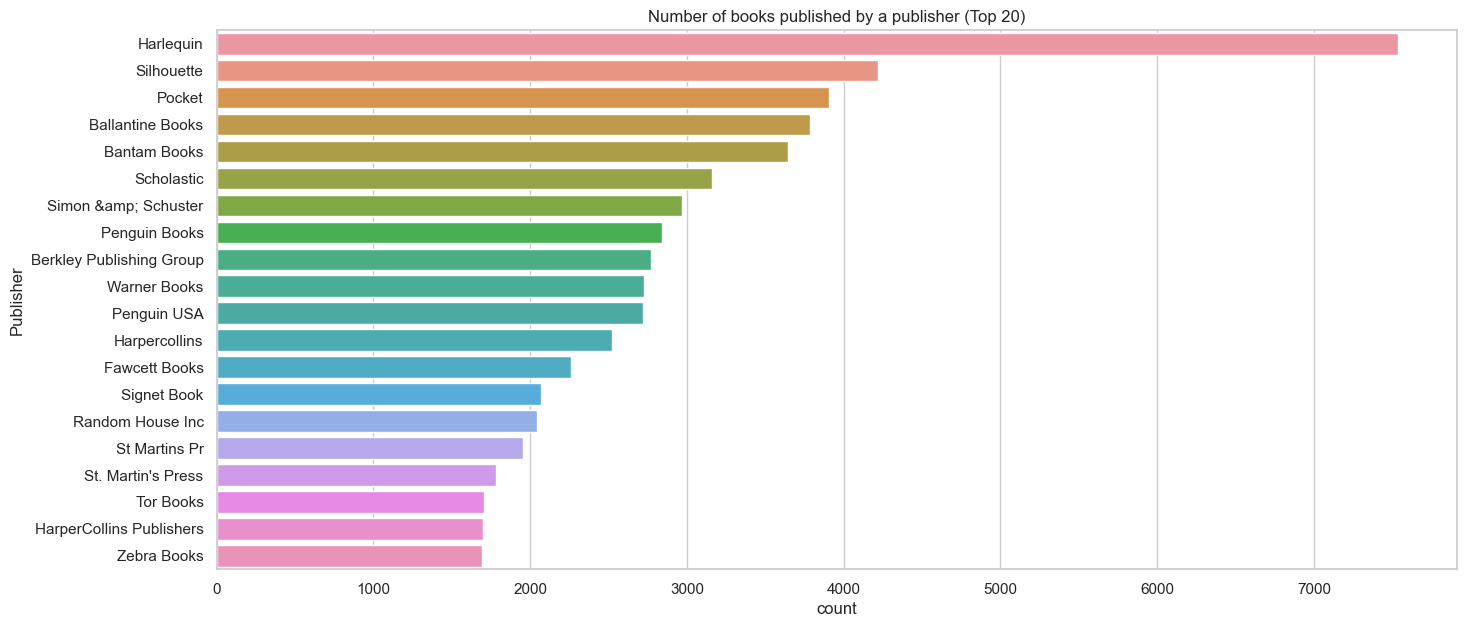

In [33]:
# number of books published by publisher (top 20)
plt.figure(figsize=(16,7))
sns.countplot(y="Publisher", data=books,order=books['Publisher'].value_counts().index[0:20])
plt.title("Number of books published by a publisher (Top 20)")

Text(0.5, 1.0, 'Number of Ratings for a book (Top 10)')

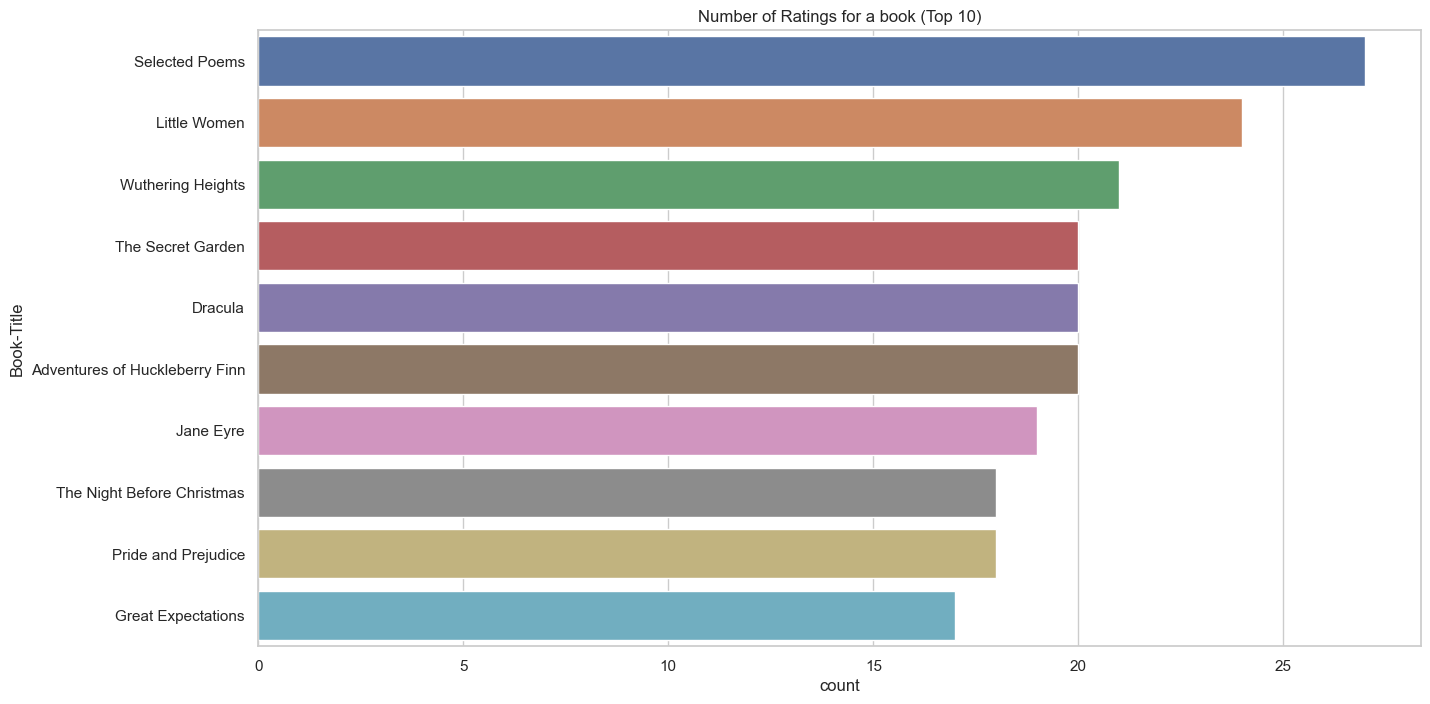

In [34]:
# Plotting of ratings 
plt.figure(figsize=(15,8))
sns.countplot(y="Book-Title", data=books, order=books['Book-Title'].value_counts().index[0:10])
plt.title("Number of Ratings for a book (Top 10)")

## Simple Popularity based Recommendation System

In [35]:
ratings_count = ratings.groupby(by=['ISBN'])['Book-Rating'].sum()
ratings_count = pd.DataFrame(ratings_count)
top10 = ratings_count.sort_values('Book-Rating' , ascending=False).head(10)
print("The following books are recommended")
top10.merge(books , left_index=True , right_on= 'ISBN')

The following books are recommended


,Book-Rating,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,year
2143,2546,059035342X,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999.0,Arthur A. Levine Books,http://images.amazon.com/images/P/059035342X.0...,http://images.amazon.com/images/P/059035342X.0...,http://images.amazon.com/images/P/059035342X.0...,NaN


# Recommendation using KNN

In [36]:
# merging datasets
merged_data = pd.merge(books, ratings, on='ISBN', how='inner')
merged_data = pd.merge(merged_data, users, on='User-ID', how='inner')

data1 = (merged_data.groupby(by = ['Book-Title'])['Book-Rating'].count().reset_index().rename(columns = {'Book-Rating': 'Total-Rating'}))


In [37]:
print(sorted(data1['Total-Rating'].unique()))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 84, 85, 86, 87, 88, 90, 91, 92, 93, 94, 95, 98, 99, 100, 101, 102, 103, 104, 106, 108, 109, 110, 116, 117, 118, 120, 121, 124, 125, 126, 127, 128, 133, 135, 139, 142, 144, 146, 147, 148, 151, 157, 160, 161, 162, 163, 168, 172, 173, 174, 176, 178, 180, 187, 190, 195, 199, 201, 203, 206, 217, 220, 229, 239, 249, 254, 280, 306, 308, 328, 331, 360, 390, 493, 519, 565, 761]


In [38]:
data = pd.merge(data1, merged_data, on='Book-Title', left_index = False)
data = data[data['Total-Rating'] >= 50]
data = data.reset_index(drop = True)

#building a matrix
from scipy.sparse import csr_matrix
df = data.pivot_table(index = 'Book-Title', columns = 'User-ID', values = 'Book-Rating').fillna(0)
matrix = csr_matrix(df)

In [39]:
from sklearn.neighbors import NearestNeighbors
book_name = input("Enter a book name: ")
model = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model.fit(matrix)

distances, indices = model.kneighbors(df.loc[book_name].values.reshape(1, -1), n_neighbors =10)
print("\nRecommended books:\n")
for i in range(0, len(distances.flatten())):
    if i > 0:
        print(df.index[indices.flatten()[i]]) 

Enter a book name: Charlie and the Chocolate Factory


KeyError: 'Charlie and the Chocolate Factory'

In [ ]:
df1 = data[data['Book-Title']=="Charlie and the Chocolate Factory"]#getting the details who read Charlie and the Chocolate Factory
df1

In [ ]:
df2 = data[data['Book-Title']=="Matilda"]#getting the details who read Matilda
df2

In [ ]:
x=set(df1["User-ID"].values)#contain the userid of those who read Charlie and the chocolate factory
y=set(df2["User-ID"].values)#contain the userid of those who read matilda

In [ ]:
similar_users = x & y
print(similar_users)

In [ ]:
data[data["User-ID"]==74689].sort_values('Book-Rating', ascending=False).head(5)

In [ ]:
data[data["User-ID"]==251394].sort_values('Book-Rating', ascending=False).head(5)

In [ ]:
data[data["User-ID"]==115490].sort_values('Book-Rating', ascending=False).head(5)

In [ ]:
data[data["User-ID"]==249628].sort_values('Book-Rating', ascending=False).head(5)

In [ ]:
data[data["User-ID"]==174791].sort_values('Book-Rating', ascending=False).head(5)

#taking similiar user-id (who has read and given the book good rating)(74689, 251394, 115490, 249628, 174791) the following are the books

In [ ]:
list = ('Stormy Weather','Charlie and the Chocolate Factory' , 'The Fellowship of the Ring (The Lord of the Rings, Part 1)' ,'A Wizard of Earthsea (Earthsea Trilogy, Book 1)','Reading Lolita in Tehran: A Memoir in Books' , 'Night' , 'Harriet the Spy' , 'The Scottish Bride (Bride Trilogy (Paperback))','The Two Towers (The Lord of the Rings, Part 2)' , 'The Secret Garden')

In [ ]:
#Top 10 books
list

In [ ]:
import pickle

In [ ]:
pickle.dump(df,open("df.pkl","wb"))

In [ ]:
pickle.dump(model,open("model.pkl","wb"))

In [ ]:
pickle.dump(data,open("data.pkl","wb"))